# EduVerse USA Chatbot — Text Preprocessing

## NLP Pipeline Module 1

This notebook demonstrates the text preprocessing pipeline for the chatbot.

### Pipeline Steps
1. Text normalization (lowercase, remove URLs/emails)
2. Tokenization using NLTK
3. Stopword removal
4. Lemmatization

### Output
Clean token sequences ready for intent classification and NER.

---
## 1. Setup

In [3]:
!pip install nltk pandas matplotlib -q

In [4]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')

# Download NLTK resources
for resource in ['punkt', 'stopwords', 'wordnet', 'omw-1.4']:
    nltk.download(resource, quiet=True)

print("Setup complete")

Setup complete


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/muhammadzafarulhaq/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


---
## 2. Sample Dataset

In [6]:
# Sample user queries for U.S. study-abroad guidance
sample_queries = [
    "What documents are required for MS admissions in the USA?",
    "I want to apply to Stanford for Fall 2026. My GPA is 3.8 and TOEFL score is 105.",
    "How do I write a strong Statement of Purpose for computer science programs?",
    "Are there any scholarships available for international students at MIT?",
    "GRE prep tips??? I need 320+ score in 2 months!!",
    "What's the difference between TOEFL and IELTS?",
    "Can you review my SOP draft? Here's the link: https://docs.google.com/example",
    "Application deadline for USC MS in CS program - when is it?",
    "PhD in Machine Learning - funding options?",
    "How many recommendation letters do I need?"
]

df = pd.DataFrame({'query': sample_queries})
print(f"Dataset: {len(df)} queries")
df.head()

Dataset: 10 queries


,query
0,What documents are required for MS admissions ...
1,I want to apply to Stanford for Fall 2026. My ...
2,How do I write a strong Statement of Purpose f...
3,Are there any scholarships available for inter...
4,GRE prep tips??? I need 320+ score in 2 months!!


---
## 3. Text Normalization

In [8]:
def normalize_text(text):
    """Clean and normalize raw text."""
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)  # Remove URLs
    text = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', ' ', text)  # Remove emails
    text = re.sub(r'[^a-z0-9\s\.\,\?]', ' ', text)  # Keep alphanumeric + basic punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Collapse whitespace
    return text

df['normalized'] = df['query'].apply(normalize_text)

# Show examples
for i in range(3):
    print(f"Original:   {df['query'].iloc[i]}")
    print(f"Normalized: {df['normalized'].iloc[i]}")
    print("-" * 60)

Original:   What documents are required for MS admissions in the USA?
Normalized: what documents are required for ms admissions in the usa?
------------------------------------------------------------
Original:   I want to apply to Stanford for Fall 2026. My GPA is 3.8 and TOEFL score is 105.
Normalized: i want to apply to stanford for fall 2026. my gpa is 3.8 and toefl score is 105.
------------------------------------------------------------
Original:   How do I write a strong Statement of Purpose for computer science programs?
Normalized: how do i write a strong statement of purpose for computer science programs?
------------------------------------------------------------


---
## 4. Tokenization

In [10]:
def tokenize(text):
    return text.split()

df['tokens'] = df['normalized'].apply(tokenize)

print("Text:", df['normalized'].iloc[0])
print("Tokens:", df['tokens'].iloc[0])


Text: what documents are required for ms admissions in the usa?
Tokens: ['what', 'documents', 'are', 'required', 'for', 'ms', 'admissions', 'in', 'the', 'usa?']


---
## 5. Stopword Removal

In [12]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    """Filter out common stopwords."""
    return [t for t in tokens if t not in stop_words and len(t) > 1]

df['filtered'] = df['tokens'].apply(remove_stopwords)

# Compare
print(f"Before: {df['tokens'].iloc[0]}")
print(f"After:  {df['filtered'].iloc[0]}")

Before: ['what', 'documents', 'are', 'required', 'for', 'ms', 'admissions', 'in', 'the', 'usa?']
After:  ['documents', 'required', 'ms', 'admissions', 'usa?']


---
## 6. Lemmatization

In [14]:
lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    """Reduce words to base form."""
    return [lemmatizer.lemmatize(t) for t in tokens]

df['lemmatized'] = df['filtered'].apply(lemmatize)

# Show examples
examples = ['universities', 'applications', 'requirements', 'studies']
for word in examples:
    print(f"{word} → {lemmatizer.lemmatize(word)}")

universities → university
applications → application
requirements → requirement
studies → study


---
## 7. Complete Pipeline

In [16]:
def preprocess(text):
    """Complete preprocessing pipeline."""
    text = normalize_text(text)
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize(tokens)
    return tokens

# Test
test = "I want to apply for MS admissions at Stanford University for Fall 2026."
print(f"Input:  {test}")
print(f"Output: {preprocess(test)}")

Input:  I want to apply for MS admissions at Stanford University for Fall 2026.
Output: ['want', 'apply', 'm', 'admission', 'stanford', 'university', 'fall', '2026.']


---
## 8. Token Frequency Visualization

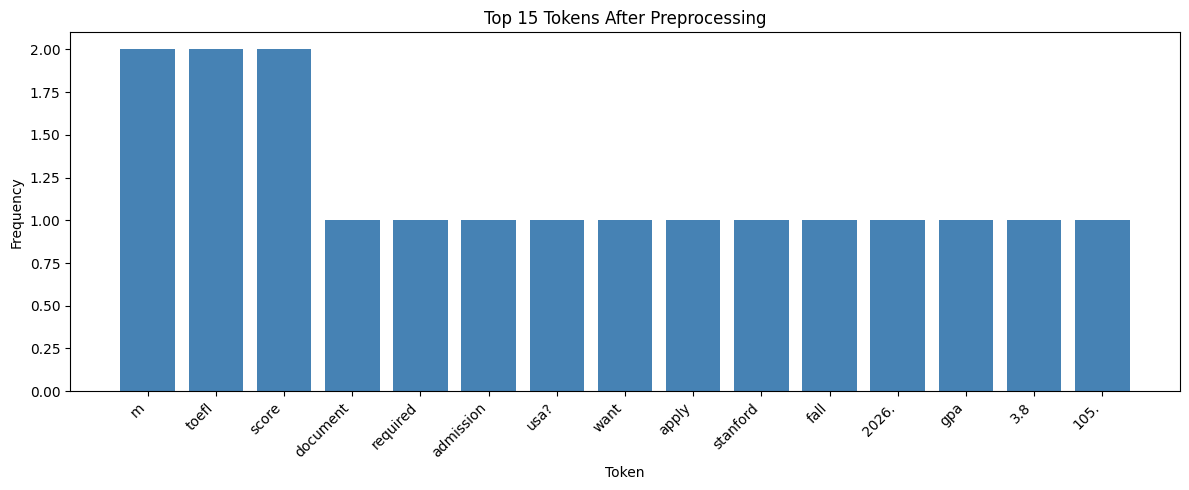

In [18]:
# Collect all tokens
all_tokens = [t for tokens in df['lemmatized'] for t in tokens]
token_freq = Counter(all_tokens).most_common(15)

# Plot
plt.figure(figsize=(12, 5))
plt.bar([t[0] for t in token_freq], [t[1] for t in token_freq], color='steelblue')
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.title('Top 15 Tokens After Preprocessing')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---
## 9. Summary

### Pipeline Output
Raw text → Normalized → Tokenized → Stopwords removed → Lemmatized

### Key Takeaways
- **Normalization** removes noise while preserving meaningful content
- **Tokenization** breaks text into analyzable units
- **Stopword removal** focuses on content-bearing words
- **Lemmatization** reduces vocabulary size while maintaining meaning

These preprocessed tokens feed into intent classification and NER modules.